In [ ]:
pip install keras==2.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# BASIC DAILY MODEL

In [64]:
dataset = pd.read_csv("/content/drive/MyDrive/Team 111 DS4A - Project/Time series/daily_corrective_series.csv", index_col=0)
print(dataset)
dataset.head()


           FECHA   ANO  MES  SEMANA  DIA_SEMANA  DIA_MES  CANTIDAD
0     2017-02-05  2017    2       5           6        5       1.0
1     2017-02-06  2017    2       6           0        6       0.0
2     2017-02-07  2017    2       6           1        7       8.0
3     2017-02-08  2017    2       6           2        8      33.0
4     2017-02-09  2017    2       6           3        9      57.0
...          ...   ...  ...     ...         ...      ...       ...
1845  2022-02-24  2022    2       8           3       24     147.0
1846  2022-02-25  2022    2       8           4       25     178.0
1847  2022-02-26  2022    2       8           5       26     161.0
1848  2022-02-27  2022    2       8           6       27     219.0
1849  2022-02-28  2022    2       9           0       28     149.0

[1850 rows x 7 columns]


,FECHA,ANO,MES,SEMANA,DIA_SEMANA,DIA_MES,CANTIDAD
0,2017-02-05,2017,2,5,6,5,1.0
1,2017-02-06,2017,2,6,0,6,0.0
2,2017-02-07,2017,2,6,1,7,8.0
3,2017-02-08,2017,2,6,2,8,33.0
4,2017-02-09,2017,2,6,3,9,57.0


In [65]:
train_test = 0.8
split_row = int(len(dataset)*train_test)


In [66]:
dataset_train = dataset.iloc[:split_row, :]
dataset_test = dataset.iloc[split_row+1:, :]
print("Train dataset shape:", dataset_train.shape)
print("Test dataset shape:", dataset_test.shape)

Train dataset shape: (1480, 7)
Test dataset shape: (369, 7)


In [67]:
training_set  = dataset_train.iloc[:, 6:7].values
training_set

array([[  1.],
       [  0.],
       [  8.],
       ...,
       [103.],
       [ 93.],
       [ 88.]])

## Data scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.00229885],
       [0.        ],
       [0.0183908 ],
       ...,
       [0.23678161],
       [0.2137931 ],
       [0.20229885]])

## Creating data structure

In [69]:
X_train = []
y_train = []
time_frame = 60
for i in range(time_frame, 1258):
    X_train.append(training_set_scaled[i-time_frame:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [70]:
X_train

array([[0.00229885, 0.        , 0.0183908 , ..., 0.04597701, 0.06436782,
        0.04827586],
       [0.        , 0.0183908 , 0.07586207, ..., 0.06436782, 0.04827586,
        0.04137931],
       [0.0183908 , 0.07586207, 0.13103448, ..., 0.04827586, 0.04137931,
        0.09425287],
       ...,
       [1.        , 0.8091954 , 0.8045977 , ..., 0.44137931, 0.32413793,
        0.14712644],
       [0.8091954 , 0.8045977 , 0.52183908, ..., 0.32413793, 0.14712644,
        0.10114943],
       [0.8045977 , 0.52183908, 0.62988506, ..., 0.14712644, 0.10114943,
        0.08965517]])

In [71]:
y_train

array([0.04137931, 0.09425287, 0.14022989, ..., 0.10114943, 0.08965517,
       0.17931034])

## Data redimensioning

In [72]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.00229885],
        [0.        ],
        [0.0183908 ],
        ...,
        [0.04597701],
        [0.06436782],
        [0.04827586]],

       [[0.        ],
        [0.0183908 ],
        [0.07586207],
        ...,
        [0.06436782],
        [0.04827586],
        [0.04137931]],

       [[0.0183908 ],
        [0.07586207],
        [0.13103448],
        ...,
        [0.04827586],
        [0.04137931],
        [0.09425287]],

       ...,

       [[1.        ],
        [0.8091954 ],
        [0.8045977 ],
        ...,
        [0.44137931],
        [0.32413793],
        [0.14712644]],

       [[0.8091954 ],
        [0.8045977 ],
        [0.52183908],
        ...,
        [0.32413793],
        [0.14712644],
        [0.10114943]],

       [[0.8045977 ],
        [0.52183908],
        [0.62988506],
        ...,
        [0.14712644],
        [0.10114943],
        [0.08965517]]])

##Model

In [91]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [92]:
regressor = Sequential()

In [93]:
#First layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

#Second layer
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

#Third layer
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

#Fourth layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#output layer
regressor.add(Dense(units = 1))

In [94]:
#Compile model with adam optimazer and MSE as loss function
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
#regressor.compile(optimizer = opt, loss = 'mean_squared_error')
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [95]:
#Training
regressor.fit(X_train, y_train, epochs = 100, batch_size = 128)

Epoch 1/100
10/10 [==============================] - 5s 22ms/step - loss: 0.0134
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 0.0075
Epoch 3/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0064
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0062
Epoch 5/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0059
Epoch 6/100
10/10 [==============================] - 0s 14ms/step - loss: 0.0056
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0055
Epoch 8/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0058
Epoch 9/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0059
Epoch 10/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0055
Epoch 11/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0054
Epoch 12/100
10/10 [==============================] - 0s 15ms/step - loss: 0.0053
Epoch 13/100
10/10 [=====

In [96]:
dataset_total = pd.concat((dataset_train['CANTIDAD'], dataset_test['CANTIDAD']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_frame:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(time_frame, 120):
    X_test.append(inputs[i-time_frame:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_events = regressor.predict(X_test)
predicted_events = sc.inverse_transform(predicted_events)


In [97]:
test_set  = dataset_test.iloc[:, 6:7].values

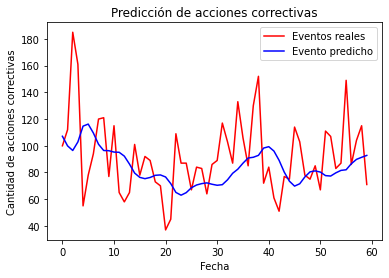

In [98]:
# Visualizar los Resultados
plt.plot(test_set[:60], color = 'red', label = 'Eventos reales')
plt.plot(predicted_events, color = 'blue', label = 'Evento predicho')
plt.title("Predicción de acciones correctivas")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de acciones correctivas")
plt.legend()
plt.show()


# BASIC WEEKLY MODEL

In [10]:
dataset = pd.read_csv("/content/drive/MyDrive/Team 111 DS4A - Project/Time series/weekly_corrective_series.csv", index_col=0)
print(dataset)
dataset.head()


      ANO  MES  SEMANA  CANTIDAD   x1
0    2017    2       5       1.0    0
1    2017    2       6     240.0    1
2    2017    2       7     275.0    2
3    2017    2       8     200.0    3
4    2017    2       9      32.0    4
..    ...  ...     ...       ...  ...
312  2022    2       5     591.0  312
313  2022    2       6     590.0  313
314  2022    2       7     735.0  314
315  2022    2       8    1077.0  315
316  2022    2       9     149.0  316

[317 rows x 5 columns]


,ANO,MES,SEMANA,CANTIDAD,x1
0,2017,2,5,1.0,0
1,2017,2,6,240.0,1
2,2017,2,7,275.0,2
3,2017,2,8,200.0,3
4,2017,2,9,32.0,4


In [11]:
train_test = 0.9
split_row = int(len(dataset)*train_test)


In [12]:
dataset_train = dataset.iloc[:split_row, :]
dataset_test = dataset.iloc[split_row+1:, :]
print("Train dataset shape:", dataset_train.shape)
print("Test dataset shape:", dataset_test.shape)

Train dataset shape: (285, 5)
Test dataset shape: (31, 5)


In [27]:
training_set  = dataset_train.iloc[:, 3:4].values
#training_set

## Data scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

## Creating data structure

In [15]:
X_train = []
y_train = []
time_frame = 20 #20 Weeks
for i in range(time_frame, len(training_set)):
    X_train.append(training_set_scaled[i-time_frame:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
X_train

array([[0.00049875, 0.11970075, 0.13715711, ..., 0.09426434, 0.1276808 ,
        0.05336658],
       [0.11970075, 0.13715711, 0.09975062, ..., 0.1276808 , 0.05336658,
        0.08977556],
       [0.13715711, 0.09975062, 0.0159601 , ..., 0.05336658, 0.08977556,
        0.13366584],
       ...,
       [0.31221945, 0.34663342, 0.31421446, ..., 0.22094763, 0.18852868,
        0.04588529],
       [0.34663342, 0.31421446, 0.29875312, ..., 0.18852868, 0.04588529,
        0.26334165],
       [0.31421446, 0.29875312, 0.19950125, ..., 0.04588529, 0.26334165,
        0.23491272]])

In [17]:
y_train

array([0.08977556, 0.13366584, 0.13366584, 0.1032419 , 0.06284289,
       0.04488778, 0.13017456, 0.11421446, 0.10224439, 0.10922693,
       0.01695761, 0.09276808, 0.1765586 , 0.16209476, 0.15062344,
       0.05436409, 0.08129676, 0.17406484, 0.18453865, 0.1840399 ,
       0.23740648, 0.02693267, 0.15860349, 0.17456359, 0.14014963,
       0.12319202, 0.03341646, 0.08229426, 0.17157107, 0.2159601 ,
       0.16957606, 0.07830424, 0.1032419 , 0.18154613, 0.24189526,
       0.16259352, 0.10124688, 0.14114713, 0.20698254, 0.26583541,
       0.2084788 , 0.07431421, 0.11820449, 0.25885287, 0.21945137,
       0.17206983, 0.07082294, 0.11321696, 0.2244389 , 0.20498753,
       0.17406484, 0.1286783 , 0.00947631, 0.3032419 , 0.31321696,
       0.27630923, 0.31670823, 0.03640898, 0.20099751, 0.21695761,
       0.23491272, 0.22892768, 0.14563591, 0.09376559, 0.23491272,
       0.21945137, 0.2553616 , 0.23740648, 0.02693267, 0.26234414,
       0.25885287, 0.25785536, 0.20448878, 0.06234414, 0.14713

## Data redimensioning

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.00049875],
        [0.11970075],
        [0.13715711],
        ...,
        [0.09426434],
        [0.1276808 ],
        [0.05336658]],

       [[0.11970075],
        [0.13715711],
        [0.09975062],
        ...,
        [0.1276808 ],
        [0.05336658],
        [0.08977556]],

       [[0.13715711],
        [0.09975062],
        [0.0159601 ],
        ...,
        [0.05336658],
        [0.08977556],
        [0.13366584]],

       ...,

       [[0.31221945],
        [0.34663342],
        [0.31421446],
        ...,
        [0.22094763],
        [0.18852868],
        [0.04588529]],

       [[0.34663342],
        [0.31421446],
        [0.29875312],
        ...,
        [0.18852868],
        [0.04588529],
        [0.26334165]],

       [[0.31421446],
        [0.29875312],
        [0.19950125],
        ...,
        [0.04588529],
        [0.26334165],
        [0.23491272]]])

##Model

In [19]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [20]:
regressor = Sequential()

In [21]:
#First layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1) ))
regressor.add(Dropout(0.2))

#Second layer
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

#Third layer
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

#Fourth layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#output layer
regressor.add(Dense(units = 1))

In [22]:
#Compile model with adam optimazer and MSE as loss function
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
regressor.compile(optimizer = opt, loss = 'mean_squared_error')

In [23]:
#Training
regressor.fit(X_train, y_train, epochs = 200, batch_size = 64)

Epoch 1/200
5/5 [==============================] - 10s 14ms/step - loss: 0.0631
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0240
Epoch 3/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0214
Epoch 4/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0215
Epoch 5/200
5/5 [==============================] - 0s 9ms/step - loss: 0.0217
Epoch 6/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0208
Epoch 7/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0210
Epoch 8/200
5/5 [==============================] - 0s 11ms/step - loss: 0.0185
Epoch 9/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0191
Epoch 10/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0184
Epoch 11/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0183
Epoch 12/200
5/5 [==============================] - 0s 10ms/step - loss: 0.0171
Epoch 13/200
5/5 [==============================]

In [24]:
dataset_total = pd.concat((dataset_train['CANTIDAD'], dataset_test['CANTIDAD']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_frame:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(time_frame, 40):
    X_test.append(inputs[i-time_frame:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_events = regressor.predict(X_test)
predicted_events = sc.inverse_transform(predicted_events)


In [25]:
test_set  = dataset_test.iloc[:, 3:4].values

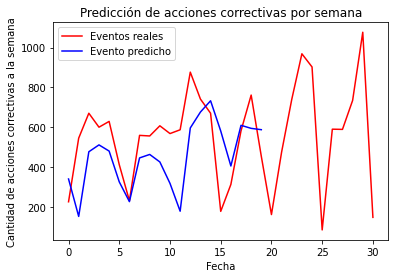

In [26]:
# Visualizar los Resultados
plt.plot(test_set[:], color = 'red', label = 'Eventos reales')
plt.plot(predicted_events, color = 'blue', label = 'Evento predicho')
plt.title("Predicción de acciones correctivas por semana")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de acciones correctivas a la semana")
plt.legend()
plt.show()


# SECOND MODEL

This model relates day of week and day of month with events.

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Team 111 DS4A - Project/Time series/weekly_combined_series.csv", index_col=0)
print(dataset)
dataset.head()


     CANTIDAD_CORRECTIVAS  CANTIDAD_CRIMENES
0                     1.0                0.0
1                   240.0                1.0
2                   275.0                1.0
3                   200.0                3.0
4                    32.0                1.0
..                    ...                ...
299                 671.0                0.0
300                 179.0                0.0
301                 314.0                0.0
302                 583.0                0.0
303                 301.0                1.0

[304 rows x 2 columns]


,CANTIDAD_CORRECTIVAS,CANTIDAD_CRIMENES
0,1.0,0.0
1,240.0,1.0
2,275.0,1.0
3,200.0,3.0
4,32.0,1.0


In [ ]:
train_test = 0.9
split_row = int(len(dataset)*train_test)


In [ ]:
dataset_train = dataset.iloc[:split_row, :]
dataset_test = dataset.iloc[split_row+1:, :]
print("Train dataset shape:", dataset_train.shape)
print("Test dataset shape:", dataset_test.shape)

Train dataset shape: (273, 2)
Test dataset shape: (30, 2)


In [ ]:
training_set  = dataset_train.iloc[:, 0:2].values
shape_data = training_set.shape
shape_data

(273, 2)

## Data scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[4.98753117e-04, 0.00000000e+00],
       [1.19700748e-01, 1.66666667e-01],
       [1.37157107e-01, 1.66666667e-01],
       [9.97506234e-02, 5.00000000e-01],
       [1.59600998e-02, 1.66666667e-01],
       [5.18703242e-02, 3.33333333e-01],
       [7.33167082e-02, 3.33333333e-01],
       [7.38154613e-02, 0.00000000e+00],
       [4.23940150e-02, 0.00000000e+00],
       [6.13466334e-02, 3.33333333e-01],
       [1.74563591e-02, 0.00000000e+00],
       [1.13216958e-01, 6.66666667e-01],
       [9.32668329e-02, 1.66666667e-01],
       [1.18703242e-01, 1.66666667e-01],
       [1.03241895e-01, 1.66666667e-01],
       [9.92518703e-02, 1.66666667e-01],
       [1.00249377e-01, 3.33333333e-01],
       [9.42643392e-02, 0.00000000e+00],
       [1.27680798e-01, 1.66666667e-01],
       [5.33665835e-02, 0.00000000e+00],
       [8.97755611e-02, 1.66666667e-01],
       [1.33665835e-01, 3.33333333e-01],
       [1.33665835e-01, 3.33333333e-01],
       [1.03241895e-01, 3.33333333e-01],
       [6.284289

## Creating data structure

In [ ]:
X_train = []
y_train = []
time_frame = 10
for i in range(time_frame, split_row):
    X_train.append(training_set_scaled[i-time_frame:i, 0:shape_data[1]])
    y_train.append(training_set_scaled[i,  0:shape_data[1]])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train.shape

(263, 10, 2)

In [ ]:
y_train.shape

(263, 2)

## Data redimensioning

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_train.shape

(263, 10, 2)

##Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
regressor = Sequential()

In [ ]:
#First layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2]) ))
regressor.add(Dropout(0.2))

#Second layer
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

#Third layer
regressor.add(LSTM(units = 50, return_sequences = True ))
regressor.add(Dropout(0.2))

#Fourth layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#output layer
regressor.add(Dense(units = X_train.shape[2]))

In [ ]:
#Compile model with adam optimazer and MSE as loss function
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
regressor.compile(optimizer = opt, loss = 'mean_squared_error')

In [ ]:
#Training
regressor.fit(X_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 2/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0013
Epoch 3/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 4/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 5/200
9/9 [==============================] - 0s 10ms/step - loss: 0.0012
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 7/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 8/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0019
Epoch 9/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 10/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 11/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0014
Epoch 12/200
9/9 [==============================] - 0s 9ms/step - loss: 0.0012
Epoch 13/200
9/9 [==============================] - 0s 9ms/s

In [ ]:
dataset_total = pd.concat((dataset_train['CANTIDAD'], dataset_test['CANTIDAD']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - time_frame:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(time_frame, 120):
    X_test.append(inputs[i-time_frame:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_events = regressor.predict(X_test)
predicted_events = sc.inverse_transform(predicted_events)


KeyError: ignored

In [ ]:
test_set  = dataset_test.iloc[:, 6:7].values

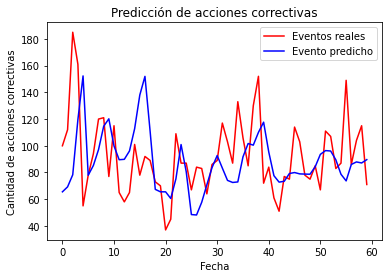

In [ ]:
# Visualizar los Resultados
plt.plot(test_set[:60], color = 'red', label = 'Eventos reales')
plt.plot(predicted_events, color = 'blue', label = 'Evento predicho')
plt.title("Predicción de acciones correctivas")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de acciones correctivas")
plt.legend()
plt.show()


# LST

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

%matplotlib inline


In [57]:
#Charge dataset
dataset = pd.read_csv("/content/drive/MyDrive/Team 111 DS4A - Project/Time series/daily_corrective_series.csv", index_col=0)
dataset
# normalize the dataset
#scaler = MinMaxScaler(feature_range=(0, 1))
#dataset = scaler.fit_transform(dataset[['ANO']])

,FECHA,ANO,MES,SEMANA,DIA_SEMANA,DIA_MES,CANTIDAD
0,2017-02-05,2017,2,5,6,5,1.0
1,2017-02-06,2017,2,6,0,6,0.0
2,2017-02-07,2017,2,6,1,7,8.0
3,2017-02-08,2017,2,6,2,8,33.0
4,2017-02-09,2017,2,6,3,9,57.0
...,...,...,...,...,...,...,...
1845,2022-02-24,2022,2,8,3,24,147.0
1846,2022-02-25,2022,2,8,4,25,178.0
1847,2022-02-26,2022,2,8,5,26,161.0
1848,2022-02-27,2022,2,8,6,27,219.0


In [58]:
data = dataset[['CANTIDAD']]
data = data.fillna(0)
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)
dataset


array([[0.00229885],
       [0.        ],
       [0.0183908 ],
       ...,
       [0.37011494],
       [0.50344828],
       [0.34252874]])

In [59]:
# split into train and test sets
train_size = int(len(dataset) * 0.77)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

1424 426


In [60]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [61]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))


In [62]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(6, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=3, batch_size=1, verbose=2)

Epoch 1/3
1420/1420 - 5s - loss: 0.0094 - 5s/epoch - 3ms/step
Epoch 2/3
1420/1420 - 3s - loss: 0.0047 - 3s/epoch - 2ms/step
Epoch 3/3
1420/1420 - 3s - loss: 0.0046 - 3s/epoch - 2ms/step
